In [1]:
!pip install pyrsgis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os, math, numpy as np
from pyrsgis import raster, convert
from osgeo import gdal
from google.colab import drive
from copy import deepcopy
from skimage.metrics import structural_similarity as ssim
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
f2017 = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/Sentinel_Bangalore_2017.tif"
f2018 = "/content/drive/MyDrive/Capstone_Data/Sentinel/2018.tif"
f2019 = "/content/drive/MyDrive/Capstone_Data/Sentinel/2019.tif"
f2020 = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/Sentinel_Bangalore_2020.tif"
f2021 = "/content/drive/MyDrive/Capstone_Data/Sentinel/2021.tif"
f2022= "/content/drive/MyDrive/Capstone_Data/Bangalore_data/Sentinel_Bangalore_2023.tif"
road_network_path = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/road.tif"
pop = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/pop.tif"
metro = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/metro.tif"
school = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/metro.tif"
flood_prox = "/content/drive/MyDrive/Capstone_Data/FloodData/floodprox.tif"
flood_region = "/content/drive/MyDrive/Capstone_Data/FloodData/floodRegions.tif"
slope = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/SlopeMap.tif"
sewage = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/Sewage.tif"
waterways = "/content/drive/MyDrive/Capstone_Data/Bangalore_data/waterWays.tif"

ds1, arr1 = raster.read(f2017,bands=1) 
ds2, arr2 = raster.read(f2018,bands=1) 
ds3, arr3 = raster.read(f2019,bands=1) 
ds4,arr4 = raster.read(f2020,bands =1)
ds5, arr5 = raster.read(f2021,bands=1) 
ds6, arr6 = raster.read(f2022,bands=1) 
road_ds,road_arr = raster.read(road_network_path,bands=1)
pop_ds, pop_arr = raster.read(pop,bands=1)
metro_ds,metro_arr = raster.read(metro,bands=1)
floodprox_ds, floodprox_arr = raster.read(flood_prox, bands=1)
flood_ds, flood_arr = raster.read(flood_region, bands=1)
slope_ds, slope_arr = raster.read(slope, bands=1)
sewage_ds, sewage_arr = raster.read(sewage, bands=1)
water_ds, water_arr = raster.read(waterways, bands=1)

if(ds1.RasterXSize == ds2.RasterXSize and ds1.RasterYSize == ds2.RasterYSize and ds1.RasterYSize == road_ds.RasterYSize and  ds1.RasterXSize == road_ds.RasterXSize):
  print("Input File size matched\n")
else:
  print("Input Files are not of same size\n")
  

no_rows = ds1.RasterYSize
no_cols = ds1.RasterXSize

print(no_rows,no_cols)
print(road_ds.RasterYSize,road_ds.RasterXSize)
print(pop_ds.RasterYSize,pop_ds.RasterXSize)
print(metro_ds.RasterYSize,metro_ds.RasterXSize)
print(floodprox_ds.RasterYSize,floodprox_ds.RasterXSize)
print(flood_ds.RasterYSize,flood_ds.RasterXSize)
print(slope_ds.RasterYSize,slope_ds.RasterXSize)
print(sewage_ds.RasterYSize,sewage_ds.RasterXSize)

Input File size matched

1266 1177
1266 1177
1266 1177
1266 1177
1266 1177
1266 1177
1266 1177
1266 1177


In [5]:
arr2017 = arr1
arr2018 = arr2
arr2019 = arr3
arr2020 = arr4
arr2021 = arr5
arr2022 = arr6

In [6]:
arr2017[arr2017==1] =3
arr2017[arr2017==4] =2
arr2017[arr2017==5]=4
arr2017[arr2017==7]=1
arr2017[arr2017==8]=4
arr2017[arr2017==11]=2
# arr2017[arr2017==4]=2

arr2018[arr2018==1] =3
arr2018[arr2018==4] =2
arr2018[arr2018==5]=4
arr2018[arr2018==7]=1
arr2018[arr2018==8]=4
arr2018[arr2018==11]=2
# arr2018[arr2018==4]=2

arr2019[arr2019==1] =3
arr2019[arr2019==4] =2
arr2019[arr2019==5]=4
arr2019[arr2019==7]=1
arr2019[arr2019==8]=4
arr2019[arr2019==11]=2
# arr2019[arr2019==4]=2

arr2020[arr2020==1] =3
arr2020[arr2020==4]=2
arr2020[arr2020==5]=4
arr2020[arr2020==7]=1
arr2020[arr2020==8]=4
arr2020[arr2020==11]=2
# arr2020[arr2020==4]=2

arr2021[arr2021==1] =3
arr2021[arr2021==4]=2
arr2021[arr2021==5]=4
arr2021[arr2021==7]=1
arr2021[arr2021==8]=4
arr2021[arr2021==11]=2
# arr2021[arr2021==4]=2

arr2022[arr2022==1] =3
arr2022[arr2022==4]=2
arr2022[arr2022==5]=4
arr2022[arr2022==7]=1
arr2022[arr2022==8]=4
arr2022[arr2022==11]=2
# arr2022[arr2022==4]=2

print(np.unique(arr2017,return_counts=True))
print(np.unique(arr2018,return_counts=True))
print(np.unique(arr2019,return_counts=True))
print(np.unique(arr2020,return_counts=True))
print(np.unique(arr2021,return_counts=True))
print(np.unique(arr2022,return_counts=True))
print(np.unique(flood_arr,return_counts=True))

(array([1, 2, 3, 4], dtype=uint8), array([900159, 251070,  19576, 319277]))
(array([1, 2, 3, 4], dtype=uint8), array([933667, 248547,  28012, 279856]))
(array([1, 2, 3, 4], dtype=uint8), array([965249, 236264,  21385, 267184]))
(array([1, 2, 3, 4], dtype=uint8), array([989554, 281444,  21209, 197875]))
(array([1, 2, 3, 4], dtype=uint8), array([1002514,  238814,   21856,  226898]))
(array([1, 2, 3, 4], dtype=uint8), array([1007092,  256310,   26563,  200117]))
(array([0., 1.], dtype=float32), array([1489893,     189]))


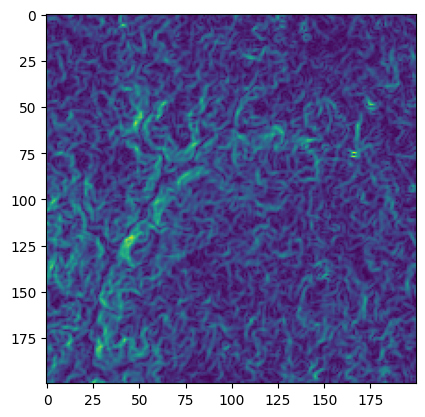

In [22]:
plt.imshow(slope_arr[200:400, 200:400])

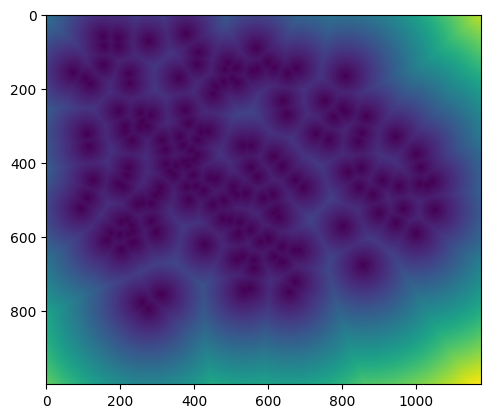

In [ ]:
plt.imshow(floodprox_arr[0:1000,:])

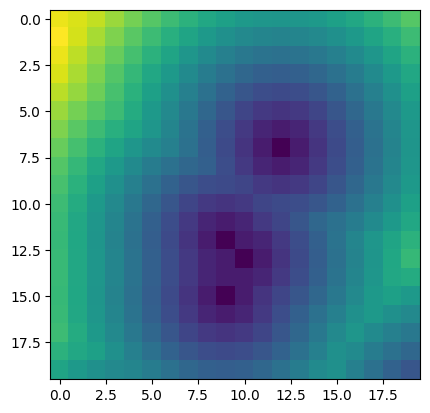

In [ ]:
plt.imshow(floodprox_arr[280:300,250:270])

In [ ]:
floodprox_arr[280:300,250:270]

array([[390.      , 379.47333 , 366.19666 , 342.05264 , 318.9044  ,
        296.98486 , 276.58633 , 258.06976 , 241.86774 , 228.47319 ,
        218.40329 , 212.13203 , 210.      , 212.13203 , 218.40329 ,
        228.47319 , 241.86774 , 258.06976 , 276.58633 , 296.98486 ],
       [402.49222 , 375.89893 , 349.85712 , 324.49963 , 300.      ,
        276.58633 , 254.55843 , 234.3075  , 216.33307 , 201.24611 ,
        189.73666 , 182.48288 , 180.      , 182.48288 , 189.73666 ,
        201.24611 , 216.33307 , 234.3075  , 254.55843 , 276.58633 ],
       [390.      , 362.4914  , 335.4102  , 308.86893 , 283.01944 ,
        258.06976 , 234.3075  , 212.13203 , 192.09373 , 174.92856 ,
        161.55495 , 152.97058 , 150.      , 152.97058 , 161.55495 ,
        174.92856 , 192.09373 , 212.13203 , 234.3075  , 258.06976 ],
       [379.47333 , 351.141   , 323.1099  , 295.46573 , 268.32816 ,
        241.86774 , 216.33307 , 192.09373 , 169.70563 , 150.      ,
        134.16408 , 123.69317 , 120.      , 1

In [ ]:
copy = np.copy(floodprox_arr)
print(np.unique(copy,return_counts=True))

(array([    0.      ,    30.      ,    42.426407, ..., 20030.387   ,
       20042.38    , 20056.72    ], dtype=float32), array([189, 747, 734, ...,   1,   1,   1]))


In [ ]:
copy[copy<320] = 1
copy[copy>=320] = 0

In [ ]:
print(np.unique(copy,return_counts=True))
print(np.unique(flood_arr,return_counts=True))

(array([0., 1.], dtype=float32), array([1432058,   58024]))
(array([0., 1.], dtype=float32), array([1489893,     189]))


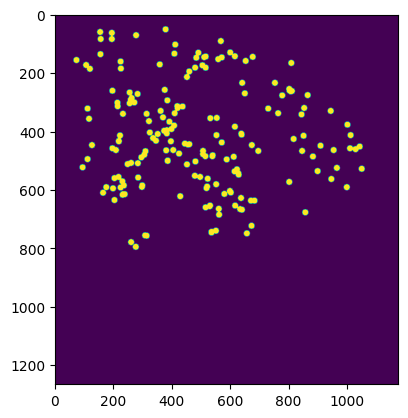

In [ ]:
plt.imshow(copy)

In [ ]:
def clip(n,inp,out,size=100):
  inn=list()
  ot=list()
  h=inp.shape[0]
  w=inp.shape[1]
  for i in range(n):
    r=random.randint(size,h-size)
    r1=random.randint(size,w-size)
    inn.append(inp[r-size:r,r1-size:r1,:])
    ot.append(out[r-size:r,r1-size:r1])
    # print(i)
  return tf.cast(inn,tf.float32),tf.cast(ot,tf.float32)

In [ ]:
input  = np.stack([arr6[0:1000,:], road_arr[0:1000,:], slope_arr[0:1000,:], sewage_arr[0:1000, :]],axis = 2)

In [ ]:
input.shape

(1000, 1177, 4)

In [ ]:
input1, output1 = clip(30, input, copy[0:1000,:], 200)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape = [200,200,4]),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(400, activation='relu'),
                                    tf.keras.layers.Dense(40000, activation = 'sigmoid')
                                    ])

In [ ]:
output1.shape

TensorShape([30, 200, 200])

In [ ]:
output2 = tf.reshape(output1, [30, 40000])

In [ ]:
output2.shape

TensorShape([30, 40000])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 198, 198, 32)      1184      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 95, 95, 64)        51264     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 47, 47, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 43, 43, 128)       204928    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 21, 21, 128)     

In [ ]:
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
model.fit(input1, output2, batch_size=5, epochs=5 )

Epoch 1/5
6/6 [==============================] - 7s 973ms/step - loss: 0.3026
Epoch 2/5
6/6 [==============================] - 7s 1s/step - loss: 0.1378
Epoch 3/5
6/6 [==============================] - 6s 980ms/step - loss: 0.1077
Epoch 4/5
6/6 [==============================] - 7s 1s/step - loss: 0.0987
Epoch 5/5
6/6 [==============================] - 6s 981ms/step - loss: 0.0958


In [ ]:
test = np.array([input[300:500, 400:600], input[600:800, 400:600]])

In [ ]:
test.shape

(2, 200, 200, 4)

In [ ]:
ans = model.predict(test)

1/1 [==============================] - 0s 121ms/step


In [ ]:
final = tf.cast(tf.reshape(ans[0], [200,200]), tf.int32)

In [ ]:
final.shape

TensorShape([200, 200])

In [ ]:
np.unique(final, return_counts=True)

(array([0, 1], dtype=int32), array([39993,     7]))

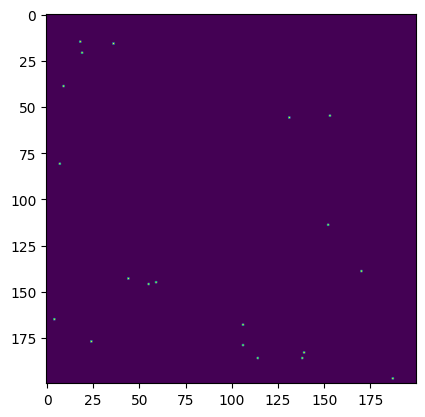

In [ ]:
plt.imshow(flood_arr[300:500, 400:600])

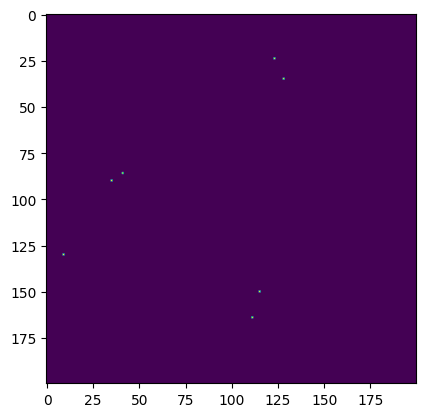

In [ ]:
plt.imshow(final)

In [ ]:
np.unique(final, return_counts=True)

(array([   0.     ,  180.87566,  183.68813, ..., 1071.6797 , 1074.8005 ,
        1075.9043 ], dtype=float32),
 array([824,   1,   1, ...,   1,   1,   1]))

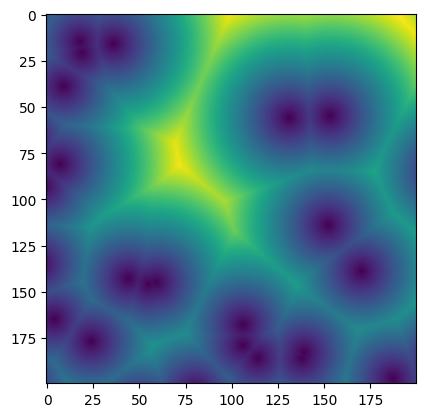

In [ ]:
plt.imshow(floodprox_arr[300:500, 400:600])

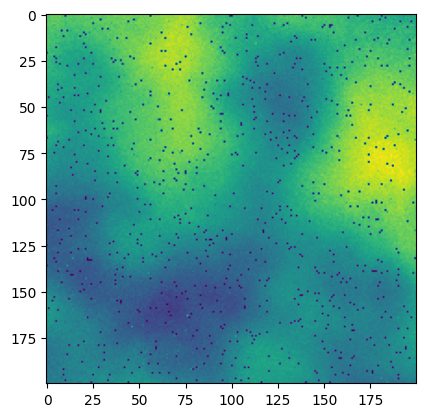

In [ ]:
plt.imshow(final)

In [ ]:
model2 = tf.keras.models.Sequential([])